<img src="https://i.imgur.com/FoKB5Z5.png" align="left" width="300" height="250" title="source: imgur.com" /></a>

## Program Code: J620-002-4:2020 

## Program Name: FRONT-END SOFTWARE DEVELOPMENT

## Title : P67 - Keras CNN on CIFAR10 Dataset

#### Name: 

#### IC Number:

#### Date :

#### Introduction : 



#### Conclusion :






# CIFAR-10 Multiple Classes

Let's go over another example of using Keras and building out CNNs. This time will use another famous data set, the CIFAR-10 dataset which consists of 10 different image types.

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [4]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 284s 2us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_train[0].shape

(32, 32, 3)

In [7]:
import matplotlib.pyplot as plt

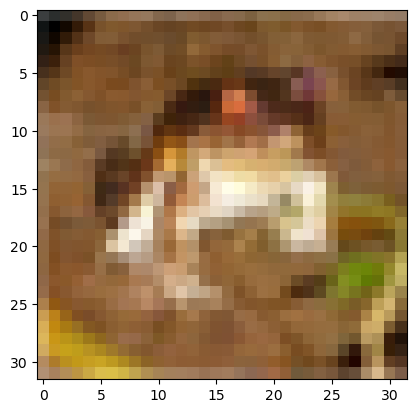

In [8]:
# FROG
plt.imshow(x_train[0])

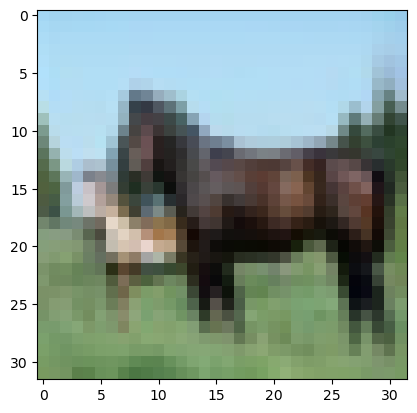

In [9]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [10]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [11]:
x_train[0].shape

(32, 32, 3)

In [12]:
x_train.max()

255

In [13]:
x_train = x_train/255

In [14]:
x_test = x_test/255

In [15]:
x_train.shape

(50000, 32, 32, 3)

In [16]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [17]:
from keras.utils import to_categorical

In [18]:
y_train.shape

(50000, 1)

In [19]:
y_train[0]

array([6], dtype=uint8)

In [20]:
y_cat_train = to_categorical(y_train,10)

In [21]:
y_cat_train.shape

(50000, 10)

In [22]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [23]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [25]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [27]:
model.fit(x_train,y_cat_train,verbose=1,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5359 - accuracy: 0.4499
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1798 - accuracy: 0.5892
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0257 - accuracy: 0.6454
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9223 - accuracy: 0.6819
Epoch 5/10
1563/1563 [==============================] - 105s 67ms/step - loss: 0.8415 - accuracy: 0.7107
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7776 - accuracy: 0.7344
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7215 - accuracy: 0.7546
Epoch 8/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6796 - accuracy: 0.7709
Epoch 9/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.6414 - accuracy: 0.7849
Epoch 10/10
1563/1563 [==============================] - 56s 36

In [29]:
# Careful, don't overwrite our file!
model.save('cifar_10epochs.h5')

In [32]:
model.metrics_names

['loss', 'accuracy']

In [33]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.1797 - accuracy: 0.6798


[1.1797479391098022, 0.6797999739646912]

In [38]:
from sklearn.metrics import classification_report

predictions = model.predict(x_test)
predictions = predictions.argmax(axis=1)

313/313 [==============================] - 2s 5ms/step


In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.63      0.71      1000
           1       0.86      0.74      0.80      1000
           2       0.67      0.46      0.54      1000
           3       0.51      0.50      0.51      1000
           4       0.53      0.75      0.62      1000
           5       0.60      0.57      0.58      1000
           6       0.72      0.79      0.76      1000
           7       0.70      0.78      0.73      1000
           8       0.81      0.74      0.77      1000
           9       0.69      0.83      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



## Optional: Large Model

In [40]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 512 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(512, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [41]:
model.fit(x_train,y_cat_train,verbose=1,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 84s 53ms/step - loss: 1.5979 - accuracy: 0.4232
Epoch 2/20
1563/1563 [==============================] - 85s 54ms/step - loss: 1.1821 - accuracy: 0.5840
Epoch 3/20
1154/1563 [=====================>........] - ETA: 23s - loss: 1.0163 - accuracy: 0.6479

KeyboardInterrupt: 

In [32]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 19s 2ms/step


[1.1244440664291382, 0.6929]

In [33]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

In [34]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.81      0.64      0.72      1000
          1       0.90      0.78      0.83      1000
          2       0.71      0.46      0.56      1000
          3       0.51      0.54      0.53      1000
          4       0.70      0.63      0.66      1000
          5       0.67      0.54      0.60      1000
          6       0.57      0.89      0.70      1000
          7       0.83      0.70      0.76      1000
          8       0.79      0.83      0.81      1000
          9       0.61      0.93      0.74      1000

avg / total       0.71      0.69      0.69     10000



In [35]:
model.save('larger_CIFAR10_model.h5')

___